# Bibliotheken laden
#### Daten-Upload

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Affinities = 'clean_raw_data\Affinitaeten.csv'
Kundensicht = 'clean_raw_data\Kundensicht.csv'
EntdeckerbonusKunden = 'clean_raw_data\EntdeckerbonusKunden.csv'
sep = ','
encoding="utf-8"

In [3]:
df_k = pd.read_csv(Kundensicht, sep=sep, encoding=encoding)
df_a = pd.read_csv(Affinities, sep=sep, encoding=encoding)
df_ebk = pd.read_csv(EntdeckerbonusKunden, sep=sep, encoding=encoding)

In [4]:
df_k.head(2)

,KundenNr,Ort,GeoId
0,8715d06c5a081b4fc09a1e3c543a46c0,Oberfell,fc3f49f4a1e3f928b3e98c606ccb1da2
1,972ca3aeccb4df7d6702925cfb516847,Rengsdorf,fc19ae7cf6355599ca723f97daecdf06


In [5]:
df_a.head(2)

,GeoId,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr70,Attr71,Attr72,Attr73,Attr74,Attr75,Attr76,Attr77,Attr78,Attr79
0,fc3f49f4a1e3f928b3e98c606ccb1da2,0.0,1.0,1.0,6.0,1.0,0.0,2.0,1.0,4.0,...,9.0,3.0,4.0,0.0,1.0,0.0,0.0,2.0,7.0,4.0
1,fc19ae7cf6355599ca723f97daecdf06,0.0,2.0,1.0,3.0,1.0,0.0,2.0,2.0,6.0,...,4.0,7.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0,2.0


In [6]:
df_ebk.head(2)

,Angebot,KundenNr,Einloesedatum,Einloesedatum_date,Einloesedatum_time,Einloesedatum_year,Einloesedatum_month,Einloesedatum_week_number
0,6640a2057810a93511ae00bf4f66357e,c31d756e5ca8e94b41ff4ebd619b68d9,2021-07-01 11:17:11.297000+00:00,2021-07-01,11:17:11.297000,2021,7,26
1,10278a9c5032bc7df577045c98e16bda,96d849e1394234ccb29e31e5e7e6722f,2021-07-01 13:46:29.099000+00:00,2021-07-01,13:46:29.099000,2021,7,26


In [7]:
# Überprüfung der Dimensionen einzelner Daten
df_ebk_shape = df_ebk.shape
df_a_shape = df_a.shape
df_k_shape = df_k.shape
print(f"df_dbc_shape: {df_ebk_shape} | df_a_shape: {df_a_shape} | df_cp_shape: {df_k_shape}")

df_dbc_shape: (931, 8) | df_a_shape: (7302, 80) | df_cp_shape: (7610, 3)


In [8]:
# Kundensicht-Datenanbindung mit Affinities
merged_df_k_df_a = pd.merge(df_k, df_a, on='GeoId', how='inner')
merged_df_k_df_a.shape

(7505, 82)

In [9]:
# Hinzufügen eines dritten Datensatzes
final_merged_df = pd.merge(merged_df_k_df_a, df_ebk, on='KundenNr', how='inner')
final_merged_df.shape

(913, 89)

In [10]:
final_merged_df.head(3)

,KundenNr,Ort,GeoId,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,...,Attr77,Attr78,Attr79,Angebot,Einloesedatum,Einloesedatum_date,Einloesedatum_time,Einloesedatum_year,Einloesedatum_month,Einloesedatum_week_number
0,10105a93b7fb41180b2986c790e79a1b,Oberelbert,5e4ec8e68ae5642f5aefc7c25ef2cf6e,0.0,2.0,1.0,3.0,1.0,0.0,2.0,...,3.0,8.0,2.0,26b5a61b402c66acceb970ce06a13bb2,2021-08-02 08:21:31.462000+00:00,2021-08-02,08:21:31.462000,2021,8,31
1,f7c8aa8e28bb712a99ab0af21d352bc5,Steinebach,c16c1177790835944174cf96838f73be,0.0,1.0,1.0,2.0,1.0,0.0,2.0,...,5.0,2.0,2.0,10278a9c5032bc7df577045c98e16bda,2021-08-25 19:00:58.738000+00:00,2021-08-25,19:00:58.738000,2021,8,34
2,f7c8aa8e28bb712a99ab0af21d352bc5,Steinebach,c16c1177790835944174cf96838f73be,0.0,1.0,1.0,2.0,1.0,0.0,2.0,...,5.0,2.0,2.0,d262f2bd4bdf79a640d3fb23f4e9bcc9,2022-02-20 09:47:13.100000+00:00,2022-02-20,09:47:13.100000,2022,2,7


# Analyse

## Anzahl der Kunden an verschiedenen Standorten

In [11]:
grouped_by_city = df_k.groupby('Ort').size().reset_index(name='number_of_clients')
grouped_by_city.shape

(814, 2)

In [12]:
# top 20 Orte mit den meisten Kunden
top_20_cities = grouped_by_city.sort_values('number_of_clients',ascending=False).head(20)
top_20_cities

,Ort,number_of_clients
361,Koblenz,1724
52,Bendorf,198
468,Montabaur,154
445,Mayen,146
386,Lahnstein,143
727,Vallendar,122
299,Höhr-Grenzhausen,118
214,Gotham City,103
600,Remagen,101
453,Mendig,94


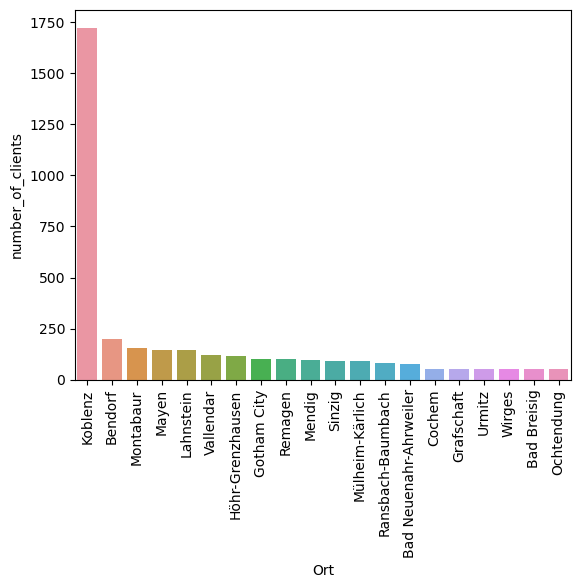

In [13]:
sns.barplot(x='Ort', y='number_of_clients', data=top_20_cities)
plt.xticks(rotation=90)
plt.show()

## Beliebtheit der Angebote bei Kunden

In [14]:
grouped_by_offer = df_ebk.groupby('Angebot').size().reset_index(name='number_of_clients')
grouped_by_offer.shape

(75, 2)

In [15]:
# Top 20 Angebote mit den meisten Kunden
top_20_offers = grouped_by_offer.sort_values('number_of_clients',ascending=False).head(20)
top_20_offers

,Angebot,number_of_clients
2,10278a9c5032bc7df577045c98e16bda,189
10,26b5a61b402c66acceb970ce06a13bb2,101
62,d262f2bd4bdf79a640d3fb23f4e9bcc9,90
29,6640a2057810a93511ae00bf4f66357e,87
20,410cbf4061850539a06e9c1e46ffe04a,59
41,84e9bc232072c7c11b4d6b2216386bed,43
71,f1d9945ab1d2359649f9d60da90c88c4,39
45,8a34e8c29ff8823e84b5c7adacba5bd6,27
16,343405eb589b5f87b684e0f959f3cb4d,20
66,dd5149f31faa61cfcb433e115093ee63,17


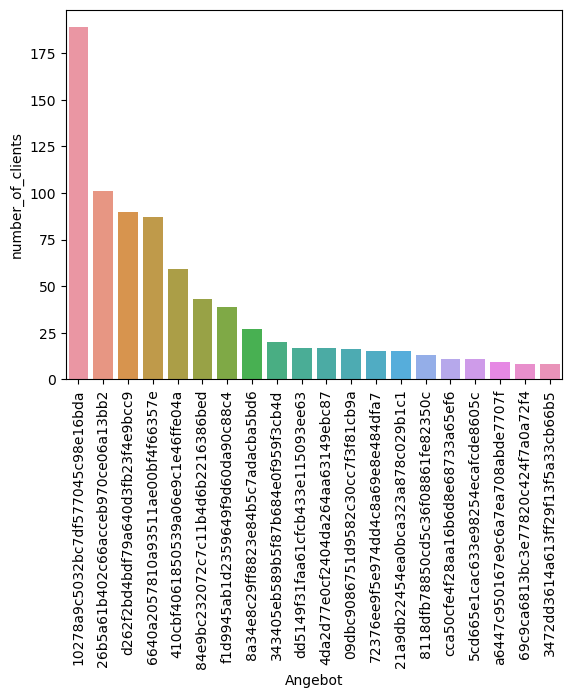

In [16]:
sns.barplot(x='Angebot', y='number_of_clients', data=top_20_offers)
plt.xticks(rotation=90)
plt.show()

## Anzahl der Angebote in Städten

In [17]:
# Daten nach der Spalte „Ort“ gruppieren und die Anzahl der Angebote zählen
offers_per_city = final_merged_df.groupby('Ort').size().reset_index(name='number_of_offers')
offers_per_city.shape

(227, 2)

In [18]:
# top 20 Städte mit den meistgenutzten Angebote 
top_20_cities = offers_per_city.sort_values('number_of_offers',ascending=False).head(20)
top_20_cities

,Ort,number_of_offers
90,Koblenz,228
75,Höhr-Grenzhausen,33
201,Vallendar,27
113,Mayen,18
97,Lahnstein,18
120,Montabaur,16
115,Mendig,15
126,Mülheim-Kärlich,15
12,Bendorf,15
35,Dieblich,14


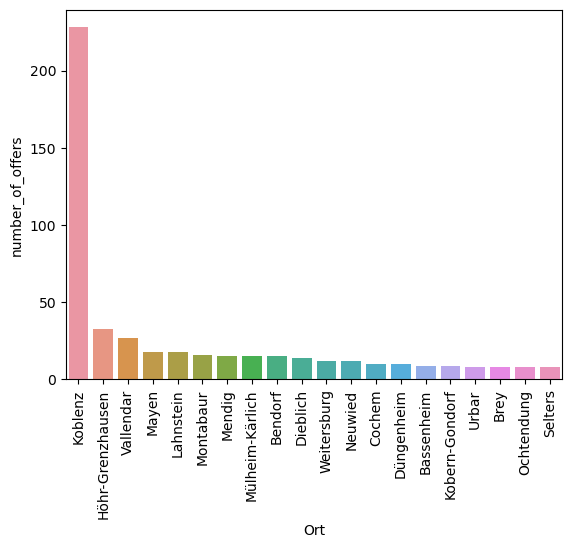

In [19]:
sns.barplot(x='Ort', y='number_of_offers', data=top_20_cities)
plt.xticks(rotation=90)
plt.show()

## Top-3-Angebote in den „X“ Städten mit der größten Anzahl an Angeboten

In [20]:
# Anzahl der Top-Städte
X = 10

In [21]:
# Gruppierung der Daten nach „Ort“ und Zählung der Anzahl der Angebote in jeder Stadt
offers_per_city = final_merged_df.groupby('Ort').size().reset_index(name='Number of Offers')

# Sortierung die Städte nach der Anzahl der Angebote und das oberste "X" nehmen
top_cities = offers_per_city.sort_values(by='Number of Offers', ascending=False).head(X)

In [22]:
# Ein leerer DataFrame für die Ergebnisse
top_offers_in_top_cities = pd.DataFrame()

# Die X-Top-Städte durchlaufen
for city in top_cities['Ort']:
    # Filtern des ursprünglichen DataFrame, sodass nur die Stadt enthalten ist, die gerade verarbeitet wird
    df_city = final_merged_df[final_merged_df['Ort'] == city]

    # Gruppieren nach Angeboten, Zählen von Vorkommnissen und Sortieren
    top_offers = df_city.groupby('Angebot').size().reset_index(name='Counts').sort_values(by='Counts', ascending=False).head(3)
    
    # Hinzufügen einer Stadtspalte, um deutlich zu machen, woher die Angebote kommen
    top_offers['Ort'] = city
    
    # Anhängen des Ergebnisses an den endgültigen DataFrame
    top_offers_in_top_cities = pd.concat([top_offers_in_top_cities, top_offers])

# Zurücksetzen des Index im endgültigen DataFrame
top_offers_in_top_cities.reset_index(drop=True, inplace=True)

print(top_offers_in_top_cities)

                             Angebot  Counts               Ort
0   10278a9c5032bc7df577045c98e16bda      31           Koblenz
1   6640a2057810a93511ae00bf4f66357e      30           Koblenz
2   d262f2bd4bdf79a640d3fb23f4e9bcc9      16           Koblenz
3   410cbf4061850539a06e9c1e46ffe04a      18  Höhr-Grenzhausen
4   6640a2057810a93511ae00bf4f66357e       6  Höhr-Grenzhausen
5   09dbc9086751d9582c30cc7f3f81cb9a       3  Höhr-Grenzhausen
6   26b5a61b402c66acceb970ce06a13bb2       7         Vallendar
7   10278a9c5032bc7df577045c98e16bda       6         Vallendar
8   84e9bc232072c7c11b4d6b2216386bed       3         Vallendar
9   26b5a61b402c66acceb970ce06a13bb2       7             Mayen
10  19c4da635a2c7a3e2a0cc577b3a35fda       4             Mayen
11  10278a9c5032bc7df577045c98e16bda       3             Mayen
12  10278a9c5032bc7df577045c98e16bda       3         Lahnstein
13  410cbf4061850539a06e9c1e46ffe04a       2         Lahnstein
14  cca50cfe4f28aa16b6d8e68733a65ef6       2         La

## Beliebtheit der Angebote in Monaten

In [23]:
# Daten für jedes Jahr filtern
df_2021 = final_merged_df[final_merged_df['Einloesedatum_year'] == 2021]
df_2022 = final_merged_df[final_merged_df['Einloesedatum_year'] == 2022]

# Gruppieren und Berechnen der Gesamtsumme der Angebote für jeden Monat
monthly_offers_2021 = df_2021.groupby('Einloesedatum_month').size()
monthly_offers_2022 = df_2022.groupby('Einloesedatum_month').size()

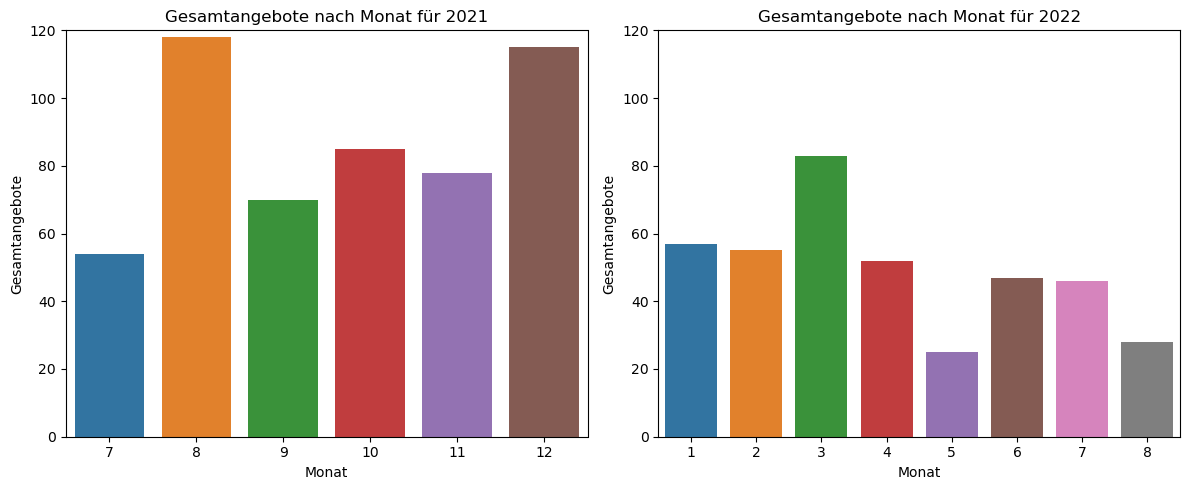

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

max_y_value = 120

# Diagramm für 2021
sns.barplot(x=monthly_offers_2021.index, y=monthly_offers_2021.values, ax=ax[0])
ax[0].set_title('Gesamtangebote nach Monat für 2021')
ax[0].set_xlabel('Monat')
ax[0].set_ylabel('Gesamtangebote')
ax[0].set_ylim(0, max_y_value)  # Einstellung der Begrenzung der Y-Achse

# Diagramm für 2022
sns.barplot(x=monthly_offers_2022.index, y=monthly_offers_2022.values, ax=ax[1])
ax[1].set_title('Gesamtangebote nach Monat für 2022')
ax[1].set_xlabel('Monat')
ax[1].set_ylabel('Gesamtangebote')
ax[1].set_ylim(0, max_y_value)  # Einstellung der Begrenzung der Y-Achse

plt.tight_layout()
plt.show()